## UnTref
## Señales y Sistemas

# PRACTICA 4: 
## CONVOLUCIÓN DE SEÑALES Y SU IMPLEMENTACION EN AUDIO


### OBJETIVO

En esta práctica se pretende reforzar el concepto de la convolución como mecanismo para conocer la salida de un sistema, dada su respuesta impulsiva y la entrada. Tambien se busca profundizar sobre las aplicaciones de esta operación en el campo de la acústica y el audio.

### OBJETIVOS ESPECIFICOS:

* Obtener la convolución de diferentes señales y comparar los resultados prácticos con los teóricos.
* Implementar la convolución en señales de audio para lograr transformaciónes como la auralización, efectos temporales, etc.
* Obtener la respuesta al impulso de un recinto a partir del método de Farina.


## Parte experimental 1: CONVOLUCIÓN DE SEÑALES

★★★☆☆ - 4.01) Generar 3 señales diferentes de mismo rango en el eje X. Realizar la convolución entre estas señales y graficar el resultado junto a las señales graficadas mediante 3 subplots apilados (es decir, alineados verticalmente). Utilizar una cantidad de muestras tal que los graficos se vean con una resolución similar a una función continua.

Las operaciones a realizar son: 
* $x_1*x_2$
* $x_1* x_3$  
* $x_2*x_3$



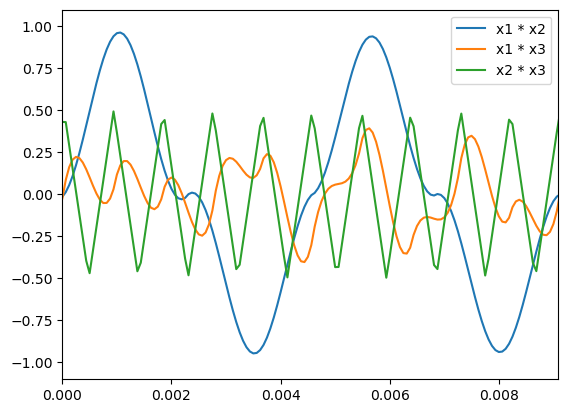

In [3]:
import numpy as np
from scipy import signal
import soundfile as sf
import matplotlib.pyplot as plt
from IPython.display import Audio
import os
from pathlib import Path

DIRNAME = os.path.abspath(os.getcwd())
AUDIO = os.path.join(DIRNAME, 'audios')

T = 10 
sample_rate = 16000
t = np.linspace(0, T, T*sample_rate)

x1 = np.sin(2*np.pi*440*t)
x2 = signal.square(2*np.pi*220*t)
x3 = signal.sawtooth(2*np.pi*1100*t)

x1_x2 = signal.fftconvolve(x1, x2, mode="same")
x1_x2 = x1_x2/max(abs(x1_x2))

x1_x3 = signal.fftconvolve(x1, x3, mode="same")
x1_x3 = x1_x3/max(abs(x1_x3))

x2_x3 = signal.fftconvolve(x2, x3, mode="same")
x2_x3 = x2_x3/max(abs(x2_x3))

plt.figure()
plt.plot(t, x1_x2, label="x1 * x2")
plt.plot(t, x1_x3, label="x1 * x3")
plt.plot(t, x2_x3, label="x2 * x3")
plt.xlim(0,2/220)
plt.legend()
plt.show()


# sf.write(os.path.join(DIRNAME, 'audios/tone_440.wav'), x1, sample_rate)
Audio(x1_x2, rate=sample_rate)
Audio(x1_x3, rate=sample_rate)
Audio(x2_x3, rate=sample_rate)




## Parte experimental 2: DELAY

El audio denominado "Guitarra.wav" consiste en un punteo de guitarra sampleado a 44100 muestras.

★★★☆☆ - 4.02) Convolucione esta grabación con otra señal de forma tal que el resultado de esta operación sea la misma grabación con un efecto de delay.

Sabiendo que la convolución de una señal x(t) con un impulso unitario da como resultado la misma x(t), que señal utilizaria para convolucionar con la grabación de guitarra y generar el efecto de delay?

423360
423360
423360


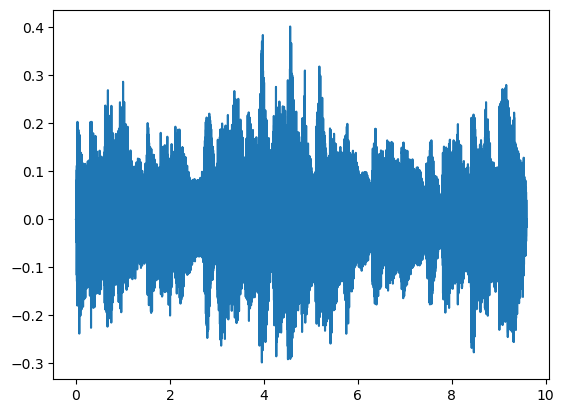

In [262]:
import numpy as np
from scipy import signal
import soundfile as sf
import matplotlib.pyplot as plt
from IPython.display import Audio
import os
from pathlib import Path

guitarra, sample_rate = sf.read(os.path.join(DIRNAME, 'audios/Guitarra.wav'))
guitarra_suma = ((guitarra[:,0]/2)+(guitarra[:,1]/2))

t = np.linspace(0, len(guitar)/sample_rate, len(guitar))
delay = np.zeros(len(t))
T = (t[-1]/2)+0.05
delay[int(T*sample_rate)] = 1

conv = signal.fftconvolve(guitarra_suma, delay, mode="same") + guitarra_suma
print(len(t))
print(len(delay))
print(len(conv))


plt.figure()
plt.plot(t, conv)
# plt.plot(t, guitarra_suma)

Audio(data=conv, rate=sample_rate)




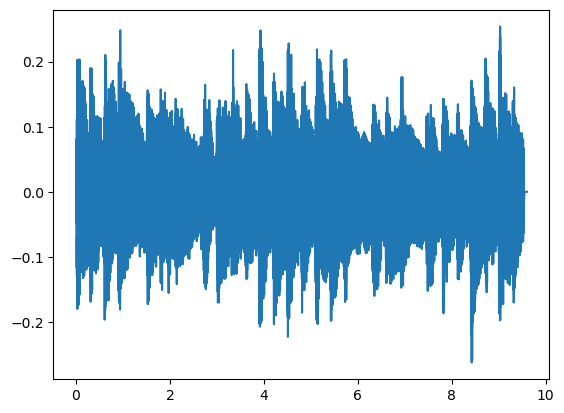

In [214]:
Audio(data=guitarra_suma, rate=sample_rate)
plt.figure()
plt.plot(t, guitarra_suma)

## Parte experimental 3: AURALIZACIÓN

★★★☆☆ - 4.03) Auralizar la señal "Guitarra.wav" a través de la respuesta al impulso "res_imp.wav" mediante el proceso de convolución y reproducirla. Se pretende que el resultado se escuche como la misma señal de guitarra con la reverberación característica del impulso utilizado. Si el resultado obtenido se escucha mal (distorsión agregada, cambio de pitch, etc), buscar la manera de solucionar el problema.

In [3]:
#Completar

## Parte experimental 4: RESPUESTA AL IMPULSO

Sabiendo que se tiene una señal de audio que corresponde a un barrido frecuencial grabado dentro de un recinto, se busca obtener la respuesta al impulso de ese lugar.

El barrido frecuencial utizilado fue logarítmico (Logaritmic Sine Sweep), tuvo una duración de 30 segundos y un ancho de banda de 30 a 16Khz.

★★★★☆ - 4.04) A partir del audio "Sweep_grabado.wav" y la información brindada sobre el barrido, obtener la respuesta al impulso del recinto en cuestión. Utilizando la respuesta al impulso obtenida, auralizar la señal "Guitarra.wav" utilizada anteriormente.

In [4]:
#Completar